# SOAL UTS
1. Klasifikasi data menggunakan metode Naive Bayes
2. Klasifikasi data menggunakan Desision Tree


## metode Naive Bayes

In [8]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Importing the dataset
iris = pd.read_csv('https://raw.githubusercontent.com/FajarAndrianto037/data/main/dataR2.csv')

In [10]:
#looking at the first 5 values of the dataset
iris.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [19]:
#Spliting the dataset in independent and dependent variables
X = iris.iloc[:,:4].values
y = iris['Classification'].values

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [21]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [23]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [24]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [26]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


## Metode Desision Tree

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns

In [28]:
# Importing the dataset
iris = pd.read_csv('https://raw.githubusercontent.com/FajarAndrianto037/data/main/dataR2.csv')

In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [41]:
iris['Insulin&Leptin_diff'] = iris['Insulin']-iris['Leptin']
iris['Adiponectin&Resistin_diff'] = iris['Adiponectin']-iris['Resistin']

In [42]:
iris['Insulin&Leptin_len_diff'] = iris['Insulin']-iris['Leptin']
iris['Adiponectin&Resistin_width_diff'] = iris['Adiponectin']-iris['Resistin']

In [43]:
iris['Insulin&Leptin_len_wid_diff'] = iris['Insulin']-iris['Leptin']
iris['Adiponectin&Resistin_wid_len_diff'] = iris['Adiponectin']-iris['Resistin']
iris

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification,...,Sepal_Petal_len_diff,Sepal_Petal_width_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff,Insulin&Leptin_diff,Adiponectin&Resistin_diff,Insulin&Leptin_len_diff,Adiponectin&Resistin_width_diff,Insulin&Leptin_len_wid_diff,Adiponectin&Resistin_wid_len_diff
0,48,23.500000,70,2.707,0.467409,-409.11815,9.702400,7.99585,417.114,1,...,411.82515,1.706550,411.82515,1.706550,411.82515,1.706550,411.82515,1.706550,411.82515,1.706550
1,83,20.690495,92,3.115,0.706897,-464.72195,5.429285,4.06405,468.786,1,...,467.83695,1.365235,467.83695,1.365235,467.83695,1.365235,467.83695,1.365235,467.83695,1.365235
2,82,23.124670,91,4.498,1.009651,-545.41985,22.432040,9.27715,554.697,1,...,549.91785,13.154890,549.91785,13.154890,549.91785,13.154890,549.91785,13.154890,549.91785,13.154890
3,68,21.367521,77,3.226,0.612725,-915.45400,7.169560,12.76600,928.220,1,...,918.68000,-5.596440,918.68000,-5.596440,918.68000,-5.596440,918.68000,-5.596440,918.68000,-5.596440
4,86,21.111111,92,3.549,0.805386,-763.34365,4.819240,10.57635,773.920,1,...,766.89265,-5.757110,766.89265,-5.757110,766.89265,-5.757110,766.89265,-5.757110,766.89265,-5.757110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,-257.27000,12.100000,10.96000,268.230,2,...,260.60000,1.140000,260.60000,1.140000,260.60000,1.140000,260.60000,1.140000,260.60000,1.140000
112,62,26.840000,100,4.530,1.117400,-322.84000,21.420000,7.32000,330.160,2,...,327.37000,14.100000,327.37000,14.100000,327.37000,14.100000,327.37000,14.100000,327.37000,14.100000
113,65,32.050000,97,5.730,1.370998,-303.72000,22.540000,10.33000,314.050,2,...,309.45000,12.210000,309.45000,12.210000,309.45000,12.210000,309.45000,12.210000,309.45000,12.210000
114,72,25.590000,82,2.820,0.570392,-389.19000,33.750000,3.27000,392.460,2,...,392.01000,30.480000,392.01000,30.480000,392.01000,30.480000,392.01000,30.480000,392.01000,30.480000


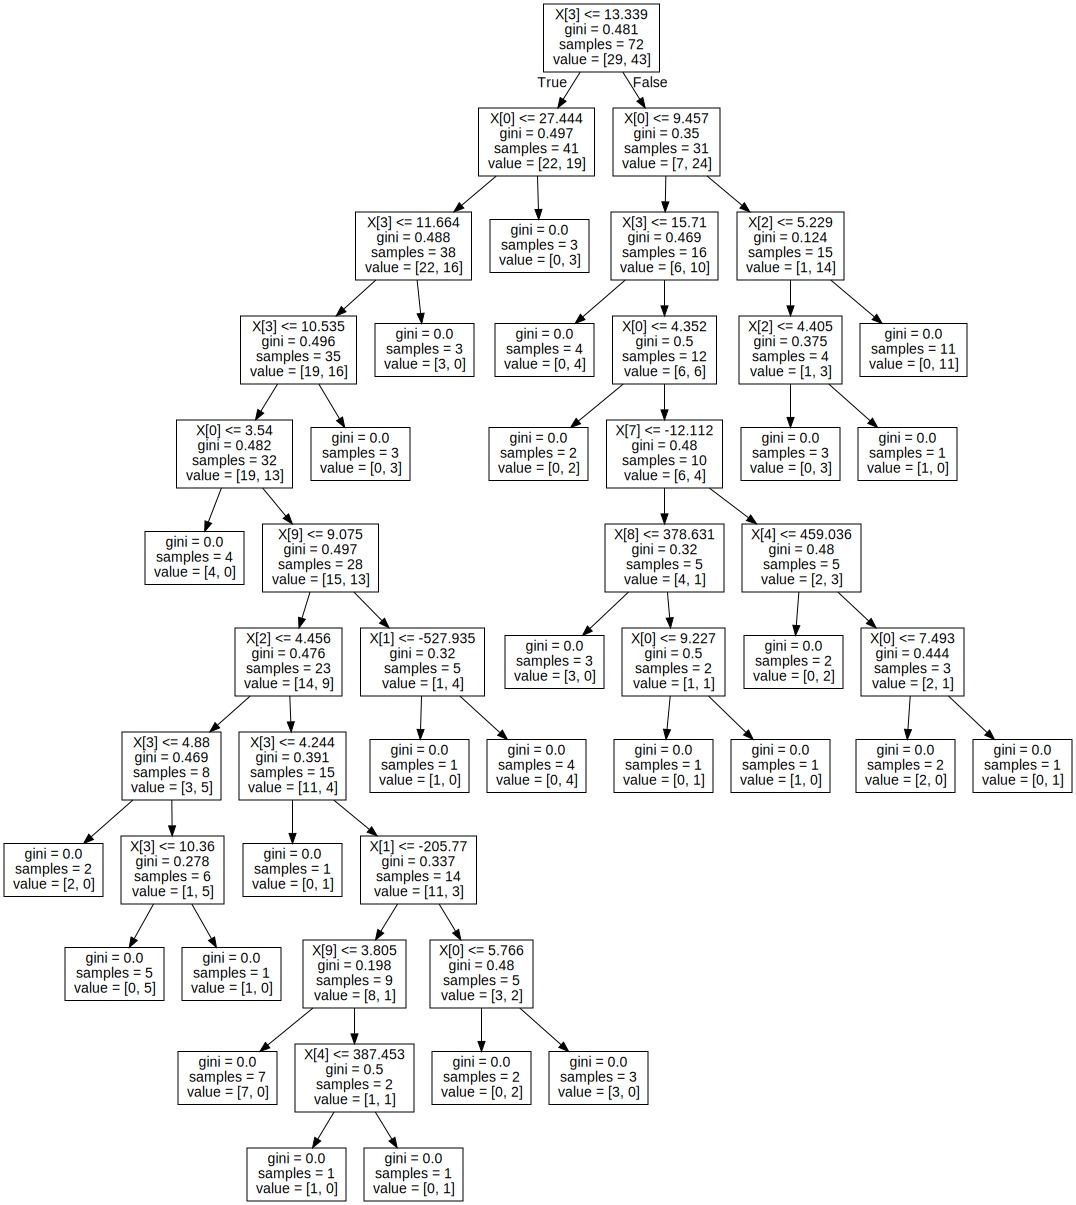

In [44]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# memisahkan variable independen dan variable target dari data iris

x = iris[['Insulin', 'Leptin', 'Adiponectin', 'Resistin', 'Insulin&Leptin_diff','Adiponectin&Resistin_diff', 'Insulin&Leptin_len_diff', 'Adiponectin&Resistin_width_diff', 'Insulin&Leptin_len_wid_diff', 'Adiponectin&Resistin_wid_len_diff']]
y = iris['Classification']

# sebelum melatih model kota split data kita dulu kedalam data train dan data test untuk tujuan validasi
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y, test_size=0.30, random_state=42)

# split data ke validasi train dan validasi test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

# membuat decision tree clasifikasi dan melatihnya dengan training dataset
iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_clf.fit(Xt,Yt)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [45]:
# cek validasi test data pada training model dan mendapatkan peforma matriks

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = iris_clf.predict(Xcv)

print('Accuracy sccore for validation test is: ',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy sccore for validation test is:  0.6666666666666666


array([[[3, 0],
        [3, 3]],

       [[3, 3],
        [0, 3]]])

In [46]:
YT_hat = iris_clf.predict(Xtest)
YT_hat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_hat)

model accuracy score on totally unseen data(Xtest) is: 65.71428571428571 %


array([[[12,  6],
        [ 6, 11]],

       [[11,  6],
        [ 6, 12]]])

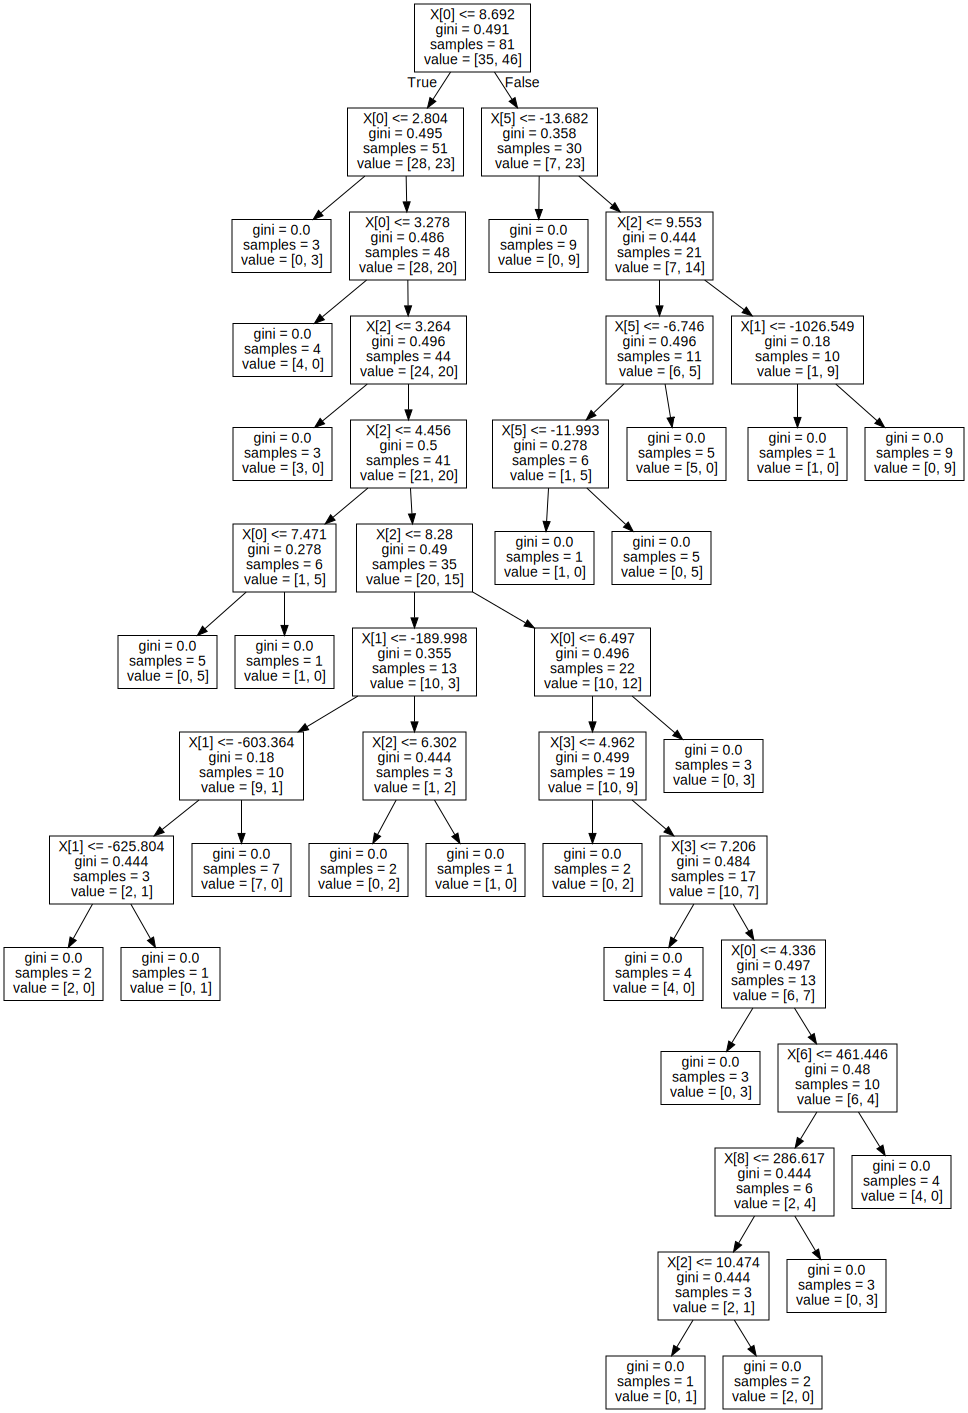

In [47]:
iris_Fclf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_Fclf.fit(Xtrain, Ytrain)

# visualisasi tree berdasarkan train dataset
dot_data = tree.export_graphviz(iris_Fclf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [48]:
YT_FHat = iris_Fclf.predict(Xtest)
YT_FHat

print("model accuracy score on totally unseen data(Xtest) is:",accuracy_score(Ytest, YT_FHat)*100,'%')

model accuracy score on totally unseen data(Xtest) is: 48.57142857142857 %
